**@author: Daniel Ramirez Guitron**

Date: 19/04/2025

Linkdin: https://www.linkedin.com/in/danielguitron/

Github: https://github.com/dannngu

E-mail: contactguitron@gmail.com

# ⚕️ Project: Schizophrenia Detection - Selected Model Test
---


### Problem

The idea is to **train and validate a Random Forest classifier** that allows determining whether or not a person may have schizophrenia based on multiple psychosocial variables.


### Purpose phase
Test the selected model with new features to see how it predict them. 


**Library imports**

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import joblib

from scipy import stats

Now it is time to make the prediction for the existing dataset to predict and see how the model behaves and classify the patients. 

In [19]:

# 1. Load trained pipeline
pipeline = joblib.load("../models/final_model.pkl")

# 2. Load original (or new) data
df = pd.read_csv("../data/raw/schizophrenia.csv")

# 3. Predict over the entire dataset
X = df.drop("diagnosis", axis=1)
y = df['diagnosis']


df["prediction"] = pipeline.predict(X)  # Target "diagnosis"
df["probability"] = pipeline.predict_proba(X)[:, 1]

# 4. Inspect results
print(df[["age", "gender", "diagnosis", "prediction", "probability"]].head(10))

# 5. Save results (optional)
df.to_csv("../data/processed/full_predictions.csv", index=False)

   age  gender  diagnosis  prediction  probability
0   24       1          1           1        0.990
1   27       0          0           0        0.190
2   38       0          0           0        0.165
3   80       0          0           0        0.050
4   38       0          0           0        0.000
5   30       1          1           1        0.990
6   64       1          1           1        0.820
7   42       1          1           1        1.000
8   76       1          1           1        0.995
9   77       1          0           0        0.125


Let's create some graphs to better see the model's predictions.

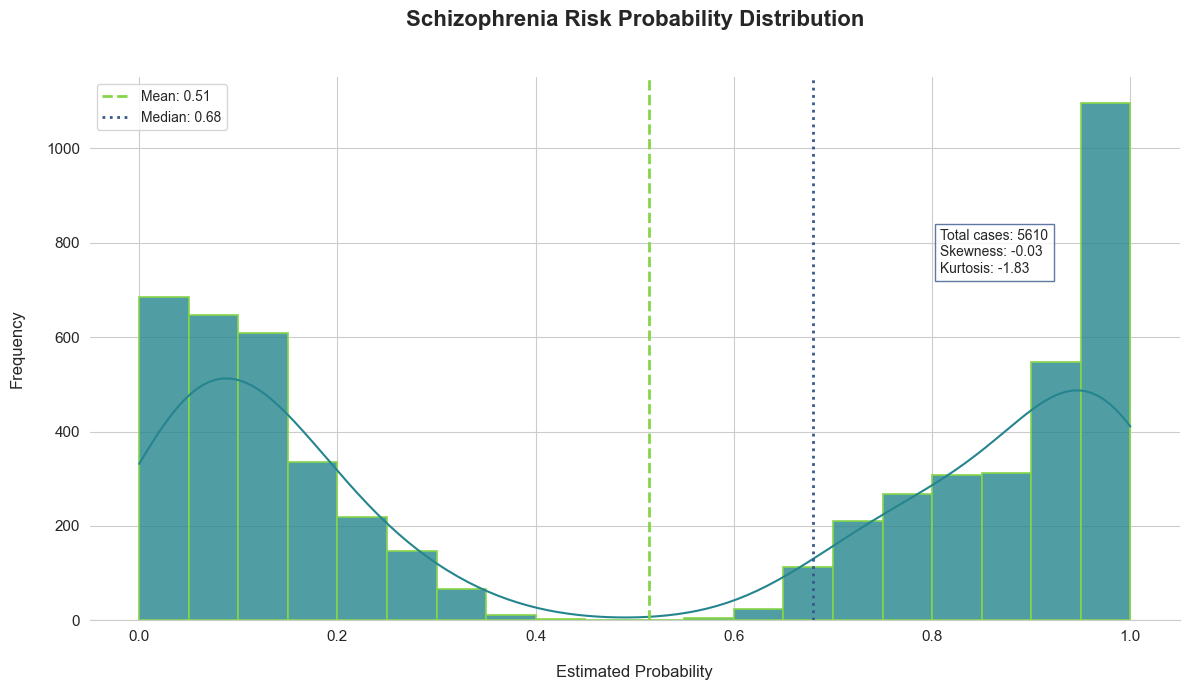

In [21]:

plt.figure(figsize=(12, 7))

# Professional style
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", n_colors=10)

# Histogram with KDE
ax = sns.histplot(df["probability"], bins=20, kde=True, 
                color=palette[4], edgecolor=palette[8], 
                linewidth=1.2, alpha=0.8)

# Reference lines
plt.axvline(df["probability"].mean(), color=palette[8], linestyle='--', linewidth=2)
plt.axvline(df["probability"].median(), color=palette[2], linestyle=':', linewidth=2)

# Text customization
plt.title("Schizophrenia Risk Probability Distribution\n", 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Estimated Probability", fontsize=12, labelpad=15)
plt.ylabel("Frequency", fontsize=12, labelpad=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=palette[8], ls='--', lw=2, label=f'Mean: {df["probability"].mean():.2f}'),
    Line2D([0], [0], color=palette[2], ls=':', lw=2, label=f'Median: {df["probability"].median():.2f}')
]

# Statistics in box
stats_text = (f"Total cases: {len(df)}\n"
             f"Skewness: {df['probability'].skew():.2f}\n"
             f"Kurtosis: {df['probability'].kurtosis():.2f}")

plt.gca().text(0.78, 0.72, stats_text, transform=plt.gca().transAxes,
              bbox=dict(facecolor='white', alpha=0.8, edgecolor=palette[2]),
              fontsize=10, verticalalignment='top')

# Add legend
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

# Final adjustments
sns.despine(left=True)
plt.tight_layout()
plt.savefig("../reports/figures/probability_distribution.png", 
           dpi=300, bbox_inches='tight', transparent=False)
plt.show()

**Observations**
